# Predicting Hotel Reservation Cancellations

Morgan Nash

December 2026

Business Understanding

Data Understanding

Data Preparation

Modeling

Evaluation

Code Quality

# Business Understanding

Maintaining occupancy is a huge challenge for the modern hotel industry. Intense competition, outdated technology systems, as well as the ease of online booking (and cancelling), are just a few of the issues that hotels are required to battle. It goes without saying that every cancelled booking means revenue is lost. 

* Aggressive pricing from competitors, along with the rise of short-term rental platforms like AirBnb, make guest retention increasingly difficult.
  
* On top of that, many of the hotel reservation systems are outdated and lack the capabilities that are needed to predict customer behavior, limiting the reliability of reservation projections.
  
* Another reason for occupancy struggles is the ease of online booking and common "free cancellation" policies. This allows for customers to make multiple reservations simultaneously, which greatly increases the chance of last-minute cancellations.

With all of this, it's not shocking that your hotel is having issues with cancelled reservations, and we understand the immediate need for a predictive intervention system. 

We are hoping to help with that by creating a classification model that predicts when a hotel reservation is "high risk" so your team can intervene and reach out with incentives to secure the booking.

# Data Understanding

This project uses the Hotel Reservations Dataset, accessed via [Kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data), and contains 36,275 records detailing customer reservations and characteristics from 2017 to 2018. This **Data Dictionary**, taken from the dataset's Kaggle page, describes each of the 19 columns: 

**Booking_ID:** unique identifier of each booking

**no_of_adults:** Number of adults

**no_of_children:** Number of Children

**no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**no_of_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**type_of_meal_plan:** Type of meal plan booked by the customer:

**required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)

**room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

**lead_time:** Number of days between the date of booking and the arrival date

**arrival_year:** Year of arrival date

**arrival_month:** Month of arrival date

**arrival_date:** Date of the month

**market_segment_type:** Market segment designation

**repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)

**no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking

**no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking

**avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

**no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

**booking_status:** Flag indicating if the booking was canceled or not.

### Why is this Dataset a good choice?

This dataset is a good choice for this project for the following reasons:

1. It contains **real data**, rather than synthethic. This data represents genuine booking activity from a single hotel, although the hotel location is undisclosed. This means our classification model will learn patterns based on real data which allows us to derive practical insights from the real customer behavior.

2. It has a **binary target:** booking_status ('Canceled' or 'Not_Canceled')

3. It contains a mix of variables that can be tied to a customer's likelihood to cancel including:
    * **Customer Demographics:** number of adults and children, whether customer was a repeat guest or not
    * **Customer Behavior:** number of weekend and weeknights booked, type of meal plan, lead time (days between booking and arrival), special requests, past booking history, whether or not a parking space was required
    * **Financial & Operational Information:** Average room price, room type  

### What Limitations exist for this Dataset?

The following list contains this dataset's primary limitations, and focuses on factors that could impact the model's generalizability:

**Limited Geographic Scope and Timeline:** The data is restricted to a 1 hotel only and is slightly outdated with the latest record from 2018 (before the Covid-19 Pandemic). The hotel location is also undisclosed. The dataset creator, [Ahsan Raza](https://www.kaggle.com/ahsan81/datasets), commented in the Discussion section: "This example data has been captured from single location/country which, due to discretionary reasons, cannot be disclosed." This adds a limit to the model's ability to generalize well to other locations after 2018.

**Missing External and Factors:** The dataset lacks external and economic influences. Information about competitor pricing, weather forecasts, or large events taking place nearby are just to name a few outside factors that frequently drive cancellation decisions, but they are invisible to the current model.

**Lack of Detailed Guest and Pricing Data:** Certain customer demographic details (like age and income), as well as records of the actual price paid by the customers (only the average is included) are absent. This limits the model's ability to truly understand a customer's price sensitivity.

**Feature Ambiguity:** Interpretation is hampered by the ciphered room type values, which cannot be leveraged fully without the encoding key, which is not included. This prevents us from deriving insights about specific room types.

# Data Preparation:

I started by loading and exploring the data



.


### Import Libraries, Load and Preview Dataset:

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data and preview
data = pd.read_csv('data/hotel_reservations.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
#check for shape, nulls, dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
#check statistics of numerical columns
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Numerical Columns Initial Observations: 
* The required_car_parking_space and repeated_guest columns should be treated as categorical (0, or 1).
* There are outliers in the following columns:
    - no_of_children (75th percentile is still 0.0, max is 10)
    - no_of_week_nights (75th percentile is 3, max is 17)
    - no_of_previous_cancellations (75th percentile is 0, max is 13)
    - no_of_previous_bookings_not_cancelled (75th percentile is 0, max is 58)
* I am curious if there are any records where no_of_weekend_nights and no_of_week_nights for a certain record are both 0.

### Data Cleaning:

In [5]:
#check for duplicate entries
data['Booking_ID'].duplicated().sum()

0

In [6]:
#drop Booking_ID column as it will not help with predicting target
data = data.drop('Booking_ID', axis=1)

In [7]:
#create a list of columns to check their value_counts
cols_to_check= ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'market_segment_type',
                'repeated_guest', 'no_of_special_requests', 'booking_status']

#loop through columns and print value counts for each
for col in cols_to_check:
    print(f"\n- Value Counts for: {col} -")
    print(data[col].value_counts())


- Value Counts for: type_of_meal_plan -
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

- Value Counts for: required_car_parking_space -
0    35151
1     1124
Name: required_car_parking_space, dtype: int64

- Value Counts for: room_type_reserved -
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

- Value Counts for: arrival_year -
2018    29761
2017     6514
Name: arrival_year, dtype: int64

- Value Counts for: market_segment_type -
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

- Value Counts for: repeated_guest -
0    35345
1      930
Name: repeated_guest, dtype: int64

- Value Counts for: no_of_special_requests -
0    19777
1    11373
2     4364
3      675
4     

In [8]:
#see distribution of the target, booking_status, as a percentage
data['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

#### Begin Feature Engineering:
In this section, we:
* address some of the low-frequency categories found in the value counts by consolidating their values
* make sure binary/discrete integer columns are changed to data type 'object' (required_car_parking_space, repeated_guest, and arrival_year(because there are only 2 years)) so they'll be treated as categorical
* manually add a maximum cap to certain numerical columns to handle their outliers
* create a column 'is_cancelled' that maps the values in 'booking_status' to 1 or 0: 'Cancelled' to 1 and 'Not_Cancelled' to 0

In [9]:
#for type_of_meal_plan, "Meal Plan 3" only accounts for 5 entries, I combine those 5 with "Not Selected"
data['type_of_meal_plan'] = data['type_of_meal_plan'].replace('Meal Plan 3', 'Not Selected')

In [10]:
#check new value counts
data['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5135
Meal Plan 2      3305
Name: type_of_meal_plan, dtype: int64

In [11]:
#for room_type_reserved, I combine "Room_Type 3" and "Room_Type 7" into "Other" as they are the least common room types
data['room_type_reserved'] = data['room_type_reserved'].replace(('Room_Type 3', 'Room_Type 7'), 'Rare')

In [12]:
#check new value counts
data['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Rare             165
Name: room_type_reserved, dtype: int64

In [13]:
#create list of integer columns to treat as categorical
cols_to_obj = ['arrival_year', 'required_car_parking_space', 'repeated_guest']
#loop through the columns and change the datatype to 'object'
for col in cols_to_obj:
    data[col] = data[col].astype('object')

In [14]:
#create a column where Canceled is encoded as 1 (positive class, representing high risk) and Not_Canceled is 0 from booking_status
data['is_canceled'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

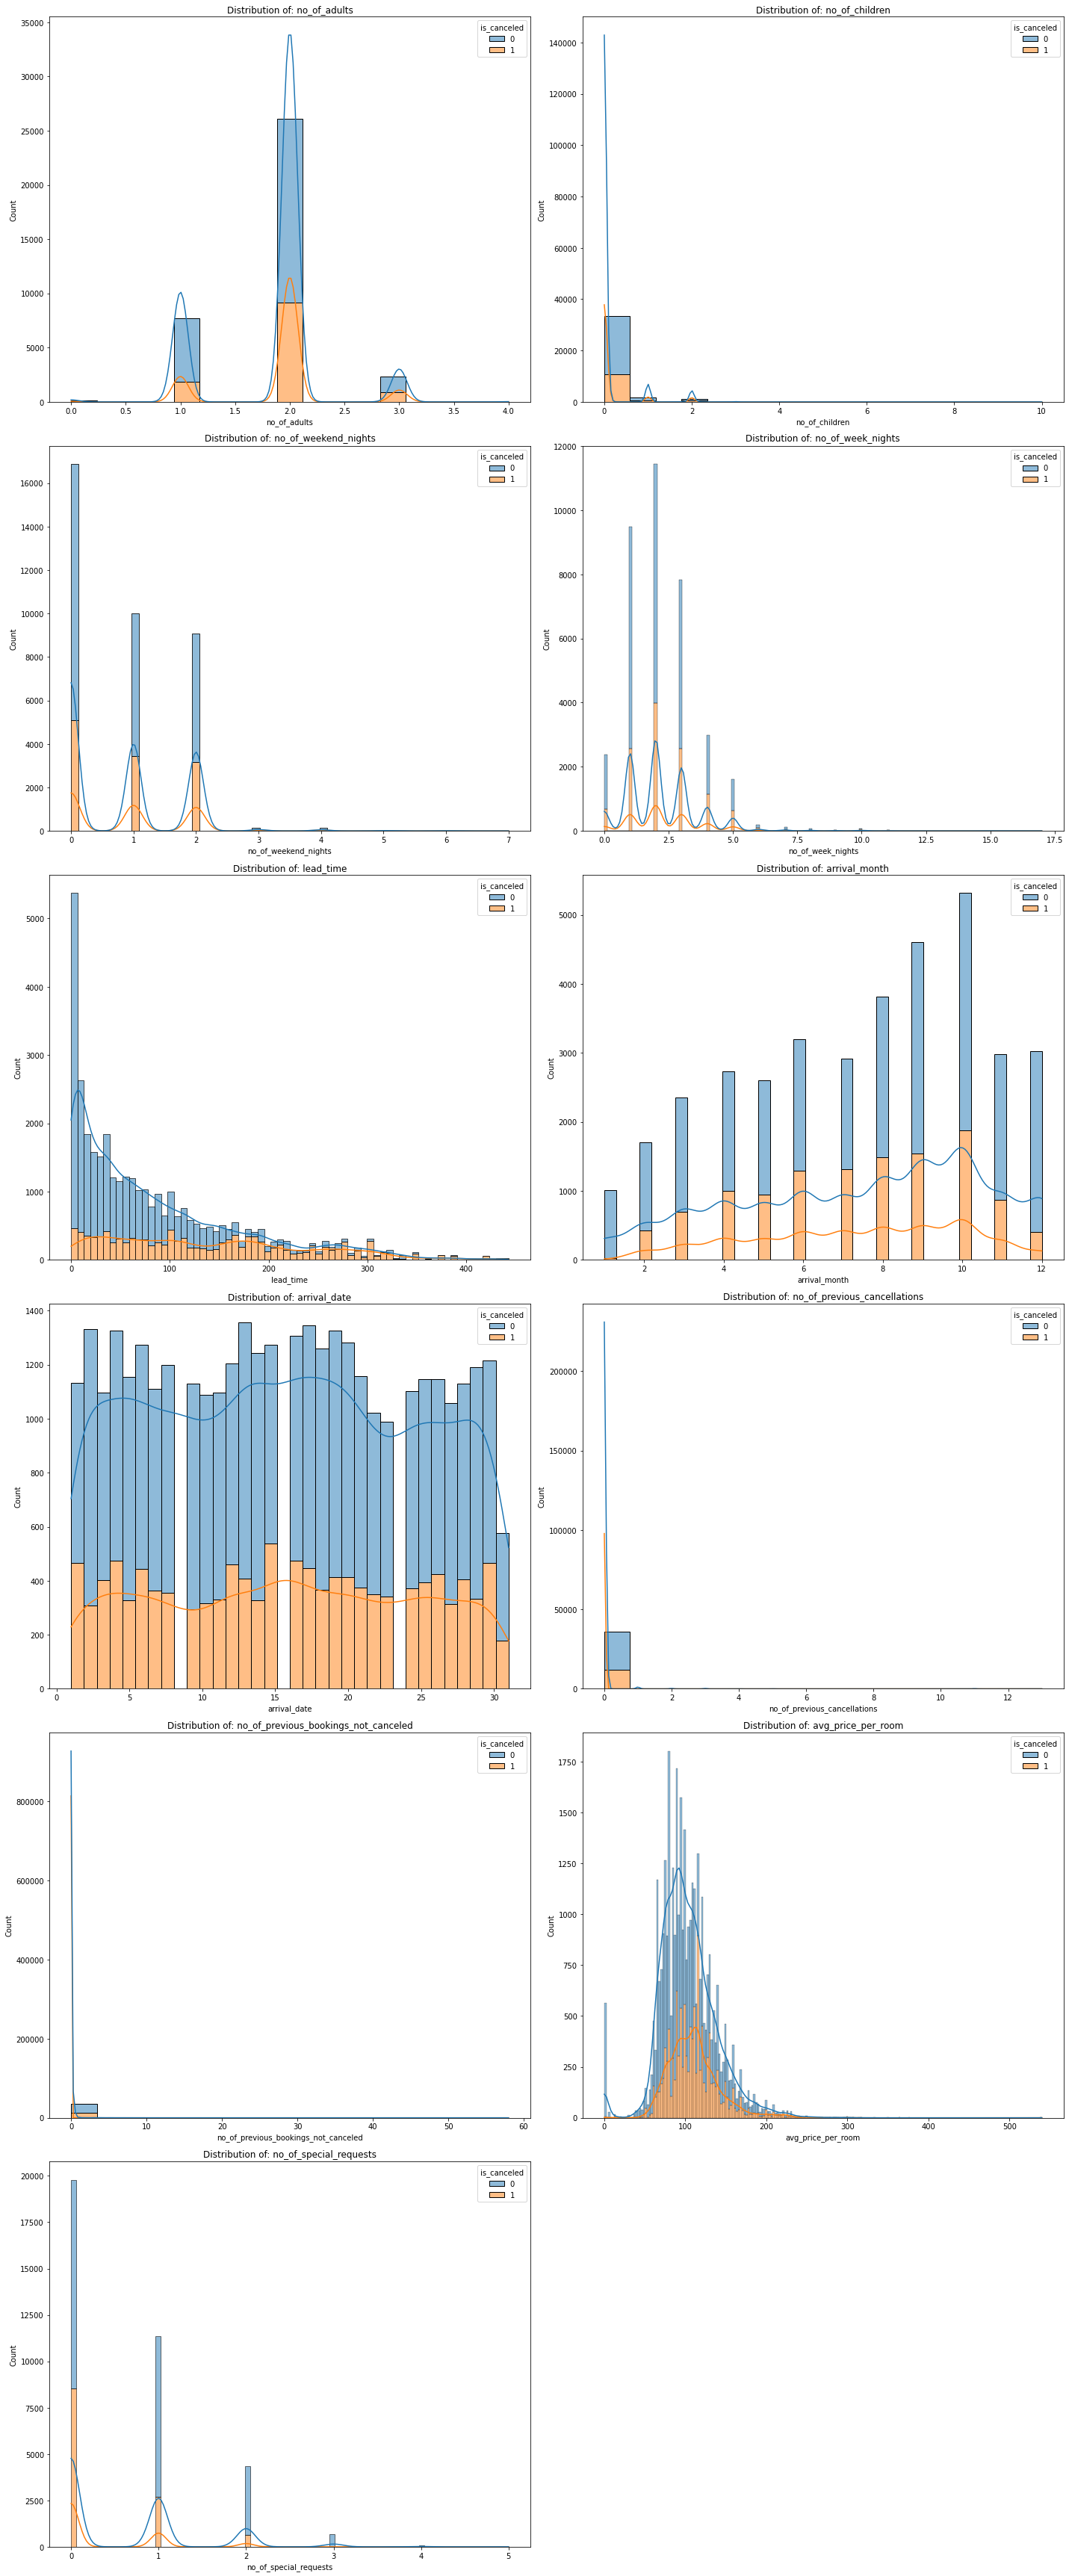

In [15]:
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

# Exclude the temporary target variable itself from the feature list
# And exclude any other columns that are now non-numeric or shouldn't be plotted (like Booking_ID)
cols_to_plot = [col for col in numeric_cols if col not in ['is_canceled']]

# Determine the grid size
num_cols = 2
num_plots = len(cols_to_plot)
# Calculate the number of rows needed (ensures the last row is included)
num_rows = (num_plots + num_cols - 1) // num_cols 

# Set up the figure size for a two-column layout
plt.figure(figsize=(10 * num_cols, 8 * num_rows)) # Height increased to 6
plt.subplots_adjust(hspace=0.7)

for i, col in enumerate(cols_to_plot):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    
    # Plot the histogram, splitting by the target variable ('is_canceled')
    sns.histplot(data=data, x=col, hue='is_canceled', kde=True, ax=ax,
                 multiple='stack', palette='tab10')
    
    ax.set_title(f'Distribution of: {col}', fontsize=12)

plt.tight_layout()
plt.show();

In [16]:
data['no_of_previous_bookings_not_canceled'].value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
21        6
20        6
19        6
18        6
17        6
22        6
23        3
24        3
25        3
27        3
32        2
44        2
31        2
30        2
29        2
48        2
28        2
26        2
38        1
33        1
58        1
34        1
35        1
57        1
36        1
56        1
37        1
55        1
54        1
45        1
39        1
53        1
40        1
52        1
41        1
51        1
42        1
50        1
43        1
49        1
47        1
46        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [17]:
data['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

In [18]:
data['no_of_week_nights'].value_counts() #(75th percentile is 3, max is 17)

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
8        62
10       62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

In [19]:
data['no_of_previous_cancellations'].value_counts() #(75th percentile is 0, max is 13)

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [20]:
# Capping using .loc for explicit control:
data.loc[data['no_of_previous_bookings_not_canceled'] > 12, 'no_of_previous_bookings_not_canceled'] = 12

In [21]:
#clear business limit. It is highly unusual for a single booking to have 9 or 10 children.
data.loc[data['no_of_children'] > 2, 'no_of_children'] = 3 

In [22]:
data.loc[data['no_of_week_nights'] > 5, 'no_of_week_nights'] = 6


In [23]:
data.loc[data['no_of_previous_cancellations'] > 3, 'no_of_previous_cancellations'] = 4


In [24]:
print(data[['no_of_previous_bookings_not_canceled', 'no_of_children', 'no_of_week_nights', 'no_of_previous_cancellations']].max())

no_of_previous_bookings_not_canceled    12
no_of_children                           3
no_of_week_nights                        6
no_of_previous_cancellations             4
dtype: int64


In [25]:
# Identify records where the total number of nights is zero
zero_nights_records = data[
    (data['no_of_weekend_nights'] == 0) & 
    (data['no_of_week_nights'] == 0)
]

print(len(zero_nights_records))

78


In [26]:
data_cleaned= data[(data['no_of_weekend_nights'] != 0) | (data['no_of_week_nights'] != 0)].copy()

print(f"Original: {len(data)}")
print(f"Cleaned: {len(data_cleaned)}")

Original: 36275
Cleaned: 36197


### Identify Features and Target & Train, Test, Split Data:

In [10]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax    
        )

        return ax